<a href="https://colab.research.google.com/github/adhikaribibek231/MachineLearning/blob/main/ch4ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [9]:
X, y = mnist["data"], mnist["target"].astype(np.uint8)

In [24]:
X_train, X_test, y_train, y_test, = X[:60000], X[60000:], y[:60000],y[60000:]

In [25]:
knn_clf = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,4,5],
    'weights': ['uniform', 'distance']
}

In [26]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [27]:
print("Best params: ", grid_search.best_params_)
print("Best CV accuracy: ", grid_search.best_score_)

Best params:  {'n_neighbors': 4, 'weights': 'distance'}
Best CV accuracy:  0.9703500000000002


In [28]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_acc)

Test accuracy:  0.9714


In [29]:
from scipy.ndimage import shift

In [30]:
def shift_image(image,dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy,dx] , cval=0, mode = "constant")
    return shifted_image.reshape([-1])

In [31]:
image = X_train[100]
shifted_image_down = shift_image(image, 0 , 5)
shifted_image_left = shift_image(image, -5, 0)
shifted_image_right = shift_image(image, 5 , 0)
shifted_image_up = shift_image(image, 0, -5)

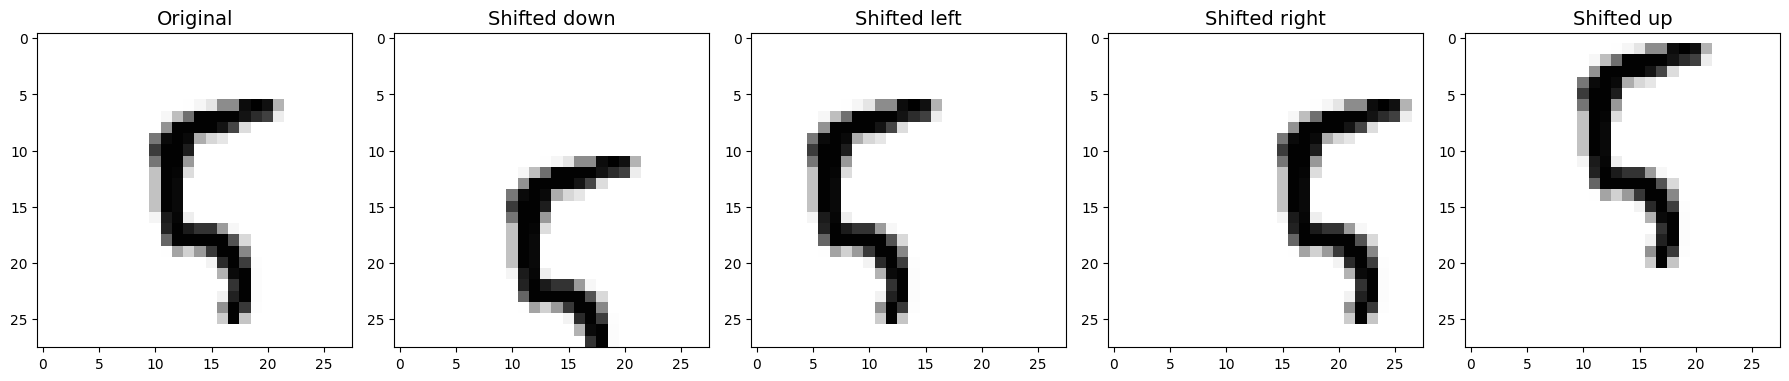

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(152)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(153)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(154)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(155)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.tight_layout()
plt.show()


In [33]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [34]:

for dx, dy, in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [35]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [36]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [37]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763